# Pytorch Basics

## Imports

In [288]:
#!pip3 install torch torchvision torchaudio
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



import torch
import torch.nn as nn

import warnings
warnings.filterwarnings("ignore")

## 1. Simple NeuralNetwork with Pytorch

### 1.1. Basic Example with MSE Loss function (without Gradient Descent)

In [304]:
def forward(x):
    return x*w

def loss(x,y_true):
    y_pred = forward(x)
    return np.sum((y_pred - y_true)**2)/N

In [305]:
x = np.array([1,2,3,4],dtype=np.float32)
y_true = 2*x
x, y_true

(array([1., 2., 3., 4.], dtype=float32),
 array([2., 4., 6., 8.], dtype=float32))

In [ ]:
N = len(x)
w = 0.5 # random weight

In [ ]:
y_random = forward(x)
y_random

In [ ]:
plt.plot(x,y_true, color="blue", label="True function")
plt.plot(x,y_random, color="green", label="Random-valued function")
plt.legend()

In [ ]:
list_loss = np.array([])
list_w = np.array([])

for w in np.arange(0.0,5.0,1.0):
    print("Loss calculation for w =",w)
    y_pred = forward(x)
    l = loss(x,y_true)
    
    print(f"optimal: {y_true}, x*w= {y_pred}, loss={l}")
    
    if l == 0:
        plt.scatter(w,l, color="orange", label="Loss = 0")
    else:
        plt.scatter(w,l, color="blue", linewidths=0.1)
    
    list_loss = np.append(list_loss,[l])
    list_w = np.append(list_w,[w])
    print(list_loss, list_w)

plt.plot(list_w,list_loss)
plt.xlabel("w")
plt.ylabel("MSE Loss")
plt.legend()

In [ ]:
print(list_loss, list_w)

In [ ]:
np.argmin(list_loss), list_w[np.argmin(list_loss)]

In [ ]:
w # the value for weight is from the for loop as the last one choosen (begin: 0.0 until 4.0)
# we need to assign the right one from one row above with list_w[np.argmin(list_loss)] then for the pred function

### 1.2. Basic Example with MSE Loss function and active Training (with Gradient descent)

In [ ]:
def gradient(x,y_true):
    return 2*x*(x*w-y_true)/N

In [ ]:
x = np.array([1,2,3],dtype=np.float32)
y_true = 2*x
x, y_true

In [ ]:
w = 1.0
lr = 0.01

In [ ]:
print(f"w0 = {w}\nx = {x}\ny={y_true}")

In [ ]:
y_pred = forward(x)
y_pred

In [ ]:
gradient(x,y_true)

In [ ]:
forward(4)

In [ ]:
for epoch in range(100):
    
    for x_val, y_val in zip(x,y_true):
        #print("actual values from x and y_true:",x_val, y_val)
        grad = gradient(x_val, y_val)
        w = w - lr * grad
        l = loss(x_val,y_val)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}:\ngrad (for {x_val, y_val} - last in this x_val and y_val): {grad}\nw: {w}, loss: {l:,.3f}\n")

In [ ]:
forward(4)

#### 1.2.1. Example 1 (with 2 weights)

In [ ]:
def function_exercise(x):
    return 2*x

In [ ]:
x = np.array([1,2,3],dtype=np.float32)
y_true = function_exercise(x)

w1 = 0.5
w2 = 0.5
b = 0.0

#y_pred = x**2*w2+x*w1+b
#y_pred, y_true

In [ ]:
def forward_exercise(x):
    return x**2*w2+x*w1+b

In [ ]:
def gradient_w1(x,y_true):
    return 2*x*(x*w1-y_true+x**2*w2+b)

def gradient_w2(x,y_true):
    return  2*x**2*(x**2*w2-y_true+x*w1+b)

In [ ]:
gradient_w1(x,y_true)

In [ ]:
gradient_w2(x,y_true)

In [ ]:
forward_exercise(x) # function which we will train st. it is equal to y_true (2*x)

In [ ]:
y_true

In [ ]:
for epoch in range(100):
    
    for x_val, y_val in zip(x,y_true):
        
        grad_w1 = gradient_w1(x_val, y_val)
        grad_w2 = gradient_w2(x_val, y_val)
        w1 = w1 - lr * grad_w1
        w2 = w2 - lr * grad_w2
        
        l = loss(x_val,y_val)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}:\ngrad (for {x_val, y_val} - last in this x_val and y_val): {grad}\nw: {w}, loss: {l:,.3f}\n")

In [ ]:
forward_exercise(x) # with more epochs (like 1000) we get a perfect prediction which is equal to y_true (2*x)

In [ ]:
y_true

### 1.3. Backpropagation and Autograd

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0])
y_true = 2*x
x,y_true

In [ ]:
lr = 0.01

In [ ]:
w = torch.tensor([1.0], requires_grad=True)
w

In [ ]:
def forward(x):
    return x*w

def loss(x,y_true):
    y_pred = forward(x)
    return (y_pred - y_true)**2

In [ ]:
forward(x)

In [ ]:
w.data, w # w.grad.data -> calling und using only after .backward() 

In [ ]:
list_loss = np.array([])
list_w = np.array([])

for epoch in range(50):
    
    for x_val, y_val in zip(x,y_true):
        l = loss(x_val,y_val)
        l.backward() # activates w.grad.data and replace grad = gradient(x_val, y_val)
        
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_() # set the gradients to zero after updating the weights
    
    if epoch % 10 == 0:
        print(f"update:\n weight ({w.data}), weight gradient ({w.grad.data}), loss ({l})")
        
    list_loss = np.append(list_loss,[l.detach().numpy()])
    list_w = np.append(list_w,[w.data.detach().numpy()])

In [ ]:
list_loss, list_w

In [ ]:
plt.plot(list_w,list_loss)
plt.xlabel("w")
plt.ylabel("MSE Loss")

In [ ]:
w, w.data

In [ ]:
forward(x)

In [ ]:
x

In [ ]:
plt.scatter(x.detach().numpy(), forward(x).detach().numpy())

#### 1.3.1. Exercise

In [ ]:
def function_exercise(x):
    return 2*x

def forward_exercise(x):
    return x**2*w2+x*w1+b

def loss(x,y_true):
    y_pred = forward_exercise(x)
    return (y_pred - y_true)**2

x = torch.tensor([1.,2.,3.]) 
y_true = function_exercise(x)

lr = 0.01

w1 = torch.tensor(0.5, requires_grad=True)
w2 = torch.tensor(0.5, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [ ]:
w1.data

In [ ]:
forward_exercise(x)

In [ ]:
y_true

In [ ]:
print(f"Before training:\nPredicted Function with random weights: {forward_exercise(x)}, True Function: {y_true}\n\n") 

for epoch in range(100):
    
    for x_val, y_val in zip(x,y_true):
        l = loss(x_val, y_val)
        l.backward()
        
        w1.data = w1.data - lr * w1.grad.data
        w2.data = w2.data - lr * w2.grad.data
        
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        
    if epoch % 10 == 0:
        print(f"Epoch {epoch}:\nWeights: {w1.data, w2.data}, Output: {forward_exercise(x).data} (True function: {y_true}), Loss: {l:,.3f}\n")

### 1.4. Linear Regression

In [233]:
x_data = torch.tensor([[1.],[2.],[3.0]])
y_data = 2*x_data #torch.tensor([[2.],[4.],[6.0]])
x_data, y_data, x_data.shape

(tensor([[1.],
         [2.],
         [3.]]),
 tensor([[2.],
         [4.],
         [6.]]),
 torch.Size([3, 1]))

In [234]:
# Basic Linear regression model
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [235]:
model = LinearRegression()

In [236]:
for param in model.parameters():
    print(param.data)

tensor([[-0.7558]])
tensor([0.6374])


In [237]:
print(model.linear.weight.shape, model.linear.weight.data)

torch.Size([1, 1]) tensor([[-0.7558]])


In [238]:
print(model.linear.bias.shape, model.linear.bias.data)

torch.Size([1]) tensor([0.6374])


In [239]:
for name in model.parameters():
    print(name)

Parameter containing:
tensor([[-0.7558]], requires_grad=True)
Parameter containing:
tensor([0.6374], requires_grad=True)


In [240]:
# Output before training
test_prediction = torch.tensor([[4.]])
print(f"Prediction: {model.forward(test_prediction.data).item():,.4f}")

Prediction: -2.3857


In [241]:
# wx+b
model.linear.weight.data*test_prediction+model.linear.bias.data

tensor([[-2.3857]])

In [242]:
criterion = torch.nn.MSELoss() # good

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
optimizer = torch.optim.Adamax(model.parameters(), lr=0.01)
optimizer = torch.optim.ASGD(model.parameters(), lr=0.01)
# optimizer = torch.optim.LBFGS(model.parameters()) # LBFGS.step() missing 1 required positional argument: 'closure'
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
optimizer = torch.optim.Rprop(model.parameters(), lr=0.01) # good for this example
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # good for this example

In [243]:
# Training
for epoch in range(500):
    y_pred = model(x_data) # forward pass
    loss = criterion(y_pred, y_data) 
    
    if epoch % 100== 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
        print(f"Prediction: {model.forward(test_prediction.data).item():,.5f}")
    
    optimizer.zero_grad() # set the gradients to zero
    loss.backward() # backward pass
    optimizer.step() # updates weights

Epoch 0, Loss: 28.820131301879883
Prediction: -2.38569
Epoch 100, Loss: 0.21291345357894897
Prediction: 7.07452
Epoch 200, Loss: 0.13156750798225403
Prediction: 7.27255
Epoch 300, Loss: 0.08130071312189102
Prediction: 7.42816
Epoch 400, Loss: 0.05023894086480141
Prediction: 7.55048


In [244]:
# Output after training
test_prediction = torch.tensor([[4.]])
print(f"Prediction: {model.forward(test_prediction.data).item():,.4f}")

Prediction: 7.6466


In [245]:
# wx+b
model.linear.weight.data*test_prediction+model.linear.bias.data

tensor([[7.6466]])

### 1.5. Logistic Regression

In [258]:
x_data = torch.tensor([[1.],[2.],[3.],[4.],[5.], [6.]])
y_data = torch.tensor([[0.],[0.],[0.],[1.],[1.], [1.]])
x_data.shape

torch.Size([6, 1])

In [362]:
# Basic logistic regression model
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        
        self.linear = torch.nn.Linear(1,1)
        self.s = nn.Sigmoid()
        self.r = nn.ReLU()
        self.t = nn.Tanh()
    
    def forward(self, x):
        y_pred = self.s(self.linear(x))
        return y_pred

In [363]:
model = LogisticRegression()
model

LogisticRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
  (s): Sigmoid()
  (r): ReLU()
  (t): Tanh()
)

In [364]:
test_prediction = torch.tensor([[4.]])
model(test_prediction)

tensor([[0.6271]], grad_fn=<SigmoidBackward0>)

In [365]:
criterion = torch.nn.BCELoss()
#criterion = torch.nn.BCEWithLogitsLoss() # for relu, tanh
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [366]:
# Training
for epoch in range(10_000):
    y_pred = model(x_data) # forward pass
    loss = criterion(y_pred, y_data) 
    
    if epoch % 1000== 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
        print(f"Prediction: {model.forward(test_prediction.data).item():,.5f}")
    
    optimizer.zero_grad() # set the gradients to zero
    loss.backward() # backward pass
    optimizer.step() # updates weights

Epoch 0, Loss: 0.6910417675971985
Prediction: 0.62706
Epoch 1000, Loss: 0.4469590485095978
Prediction: 0.69123
Epoch 2000, Loss: 0.3385319709777832
Prediction: 0.69831
Epoch 3000, Loss: 0.2794446349143982
Prediction: 0.70696
Epoch 4000, Loss: 0.2423749417066574
Prediction: 0.71532
Epoch 5000, Loss: 0.21673928201198578
Prediction: 0.72306
Epoch 6000, Loss: 0.19777274131774902
Prediction: 0.73018
Epoch 7000, Loss: 0.1830432415008545
Prediction: 0.73675
Epoch 8000, Loss: 0.1711837500333786
Prediction: 0.74283
Epoch 9000, Loss: 0.1613667756319046
Prediction: 0.74850


In [367]:
test_prediction = torch.tensor([[4.]])
model(test_prediction)

tensor([[0.7538]], grad_fn=<SigmoidBackward0>)

### 1.6. Wider and deeper NeuralNetwork with a dataset

In [3]:
df = pd.read_csv("data/diabetes.csv", delimiter=',')
df.head()

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [4]:
df = df.to_numpy(dtype=np.float32)
df.shape, df[0]

((758, 9),
 array([-0.882353 , -0.145729 ,  0.0819672, -0.414141 ,  0.       ,
        -0.207153 , -0.766866 , -0.666667 ,  1.       ], dtype=float32))

In [5]:
df[0,-1] # will be our y value

1.0

In [6]:
x = torch.from_numpy(df[:,:-1])
y = torch.from_numpy(df[:,-1]).unsqueeze(dim=1)
x[0], y[0], x.shape, y.shape

(tensor([-0.8824, -0.1457,  0.0820, -0.4141,  0.0000, -0.2072, -0.7669, -0.6667]),
 tensor([1.]),
 torch.Size([758, 8]),
 torch.Size([758, 1]))

#### 1.6.1. Model 1 (3 layers, sigmoid)

In [61]:
# Model 1
class Model1(torch.nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        
        self.sgm = torch.nn.Sigmoid()
    
    def forward(self, x):
        output = self.sgm(self.linear1(x))
        output = self.sgm(self.linear2(output))
        output = self.sgm(self.linear3(output))
        
        return output

In [62]:
model = Model1()
model

Model1(
  (linear1): Linear(in_features=8, out_features=6, bias=True)
  (linear2): Linear(in_features=6, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=1, bias=True)
  (sgm): Sigmoid()
)

In [28]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [29]:
# Prediction before training
test_prediction = torch.tensor(x[0])
print("Values from first sample of x:\n",test_prediction,"\n","Prediction:", model.forward(test_prediction.data).item(), "(true:", y[0].data,")")

Values from first sample of x:
 tensor([-0.8824, -0.1457,  0.0820, -0.4141,  0.0000, -0.2072, -0.7669, -0.6667]) 
 Prediction: 0.6542232036590576 (true: tensor([1.]) )


In [30]:
# Training
for epoch in range(10_000):
    y_pred = model(x) # forward pass
    loss = criterion(y_pred, y) 
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
    
    optimizer.zero_grad() # set the gradients to zero
    loss.backward() # backward pass
    optimizer.step() # updates weights

Epoch 0, Loss: -0.0


KeyboardInterrupt: 

In [ ]:
# Prediction after training
test_prediction = torch.tensor(x[0])
print("Values from first sample of x:\n",test_prediction,"\n","Prediction:", model.forward(test_prediction.data).item(), "(true:", y[0].data,")")

#### 1.6.2. Model 2 (10 layers, sigmoid)

In [70]:
# Model 2
class Model2(torch.nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        
        self.linear1 = torch.nn.Linear(8,1000)
        self.linear2 = torch.nn.Linear(1000,900)
        self.linear3 = torch.nn.Linear(900,800)
        self.linear4 = torch.nn.Linear(800,700)
        self.linear5 = torch.nn.Linear(700,600)
        self.linear6 = torch.nn.Linear(600,500)
        self.linear7 = torch.nn.Linear(500,400)
        self.linear8 = torch.nn.Linear(400,300)
        self.linear9 = torch.nn.Linear(300,200)
        self.linear10 = torch.nn.Linear(200,1)
        
        self.sgm = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
    
    def forward(self, x):
        output = self.relu(self.linear1(x))
        output = self.sgm(self.linear2(output))
        output = self.relu(self.linear3(output))
        output = self.sgm(self.linear4(output))
        output = self.relu(self.linear5(output))
        output = self.sgm(self.linear6(output))
        output = self.relu(self.linear7(output))
        output = self.sgm(self.linear8(output))
        output = self.relu(self.linear9(output))
        output = self.sgm(self.linear10(output))
        
        return output

In [82]:
model = Model2()
model

Model2(
  (linear1): Linear(in_features=8, out_features=1000, bias=True)
  (linear2): Linear(in_features=1000, out_features=900, bias=True)
  (linear3): Linear(in_features=900, out_features=800, bias=True)
  (linear4): Linear(in_features=800, out_features=700, bias=True)
  (linear5): Linear(in_features=700, out_features=600, bias=True)
  (linear6): Linear(in_features=600, out_features=500, bias=True)
  (linear7): Linear(in_features=500, out_features=400, bias=True)
  (linear8): Linear(in_features=400, out_features=300, bias=True)
  (linear9): Linear(in_features=300, out_features=200, bias=True)
  (linear10): Linear(in_features=200, out_features=1, bias=True)
  (sgm): Sigmoid()
  (relu): ReLU()
)

In [83]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Rprop(model.parameters(), lr=0.001)

In [84]:
# Training
for epoch in range(100):
    y_pred = model(x) # forward pass
    loss = criterion(y_pred, y) 
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
    
    optimizer.zero_grad() # set the gradients to zero
    loss.backward() # backward pass
    optimizer.step() # updates weights

Epoch 0, Loss: 0.6864706873893738
Epoch 10, Loss: 0.6439999938011169
Epoch 20, Loss: 0.4930199384689331
Epoch 30, Loss: 0.4593561887741089
Epoch 40, Loss: 0.4329206049442291
Epoch 50, Loss: 0.40515032410621643
Epoch 60, Loss: 0.36090418696403503
Epoch 70, Loss: 0.327859103679657
Epoch 80, Loss: 0.2892993986606598
Epoch 90, Loss: 0.2435949295759201


In [86]:
# Prediction before training
test_prediction = torch.tensor(x[0])
print("Values from first sample of x:\n",test_prediction,"\n","Prediction:", model.forward(test_prediction.data).item(), "(true:", y[0].data,")")

Values from first sample of x:
 tensor([-0.8824, -0.1457,  0.0820, -0.4141,  0.0000, -0.2072, -0.7669, -0.6667]) 
 Prediction: 0.9989342093467712 (true: tensor([1.]) )


### 1.7. NeuralNetwork on titanic dataset

#### 1.7.1. Preprocessing

In [244]:
train = pd.read_csv("data/titanic_train.csv")
test = pd.read_csv("data/titanic_test.csv")
train.shape, test.shape

((891, 12), (418, 11))

In [245]:
items_to_drop = ["Ticket", "Cabin", "Name", "PassengerId"]
items_to_encode = ["Sex", "Embarked"]
items_to_median = ["SibSp", "Parch", "Fare", "Age", "Embarked"]
                   
def clean(data, items_to_drop=items_to_drop, items_to_encode=items_to_encode, items_to_median=items_to_median):
    data = data.drop(items_to_drop, axis=1)
    for col in items_to_median:
        if col == "Embarked":
            data[col].fillna(value="U", inplace=True)
        else:
            data[col].fillna(value=data[col].median(), inplace=True)
    if items_to_encode:        
        labelencoder = preprocessing.LabelEncoder()
        print(f"Data encoded({items_to_encode}):")
        for i, col in enumerate(items_to_encode):
            data[col] = labelencoder.fit_transform(data[col])
            for j, col2 in enumerate(labelencoder.classes_):
                print("Encoding for",col, ":", labelencoder.classes_[j],"has the index",j)
    return data

In [246]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [248]:
train_clean = clean(train)
train_clean.head()

Data encoded(['Sex', 'Embarked']):
Encoding for Sex : female has the index 0
Encoding for Sex : male has the index 1
Encoding for Embarked : C has the index 0
Encoding for Embarked : Q has the index 1
Encoding for Embarked : S has the index 2
Encoding for Embarked : U has the index 3


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [249]:
test_cleaned = clean(test)
test_cleaned.head()

Data encoded(['Sex', 'Embarked']):
Encoding for Sex : female has the index 0
Encoding for Sex : male has the index 1
Encoding for Embarked : C has the index 0
Encoding for Embarked : Q has the index 1
Encoding for Embarked : S has the index 2


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [250]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [251]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [252]:
X = train_clean.drop("Survived", axis=1)
y = train_clean["Survived"]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [253]:
y[:3]

0    0
1    1
2    1
Name: Survived, dtype: int64

In [254]:
X = X.to_numpy(dtype=np.float32)

In [255]:
X[0]

array([ 3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25,  2.  ], dtype=float32)

In [256]:
y = y.to_numpy(dtype=np.float32)

In [257]:
y[:3]

array([0., 1., 1.], dtype=float32)

In [258]:
X = torch.from_numpy(X)
y = torch.from_numpy(y).unsqueeze(dim=1)
X.shape, y.shape

(torch.Size([891, 7]), torch.Size([891, 1]))

In [259]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [261]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

(torch.Size([712, 7]),
 torch.Size([179, 7]),
 torch.Size([712, 1]),
 torch.Size([179, 1]))

#### 1.7.2. NeuralNetwork

In [262]:
# Model Titanic
class ModelTitanic(torch.nn.Module):
    def __init__(self):
        super(ModelTitanic, self).__init__()
        
        self.linear1 = torch.nn.Linear(7,100)
        self.linear2 = torch.nn.Linear(100,50)
        self.linear3 = torch.nn.Linear(50,1)
        
        self.sgm = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
    
    def forward(self, x):
        output = self.relu(self.linear1(x))
        output = self.sgm(self.linear2(output))
        output = self.sgm(self.linear3(output))
        
        return output

In [263]:
model = ModelTitanic()
model

ModelTitanic(
  (linear1): Linear(in_features=7, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=1, bias=True)
  (sgm): Sigmoid()
  (relu): ReLU()
)

In [265]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [266]:
# Training
for epoch in range(1000):
    y_pred = model(X_train) # forward pass
    loss = criterion(y_pred, y_train) 
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
    
    optimizer.zero_grad() # set the gradients to zero
    loss.backward() # backward pass
    optimizer.step() # updates weights

Epoch 0, Loss: 0.6961296200752258
Epoch 100, Loss: 0.6157055497169495
Epoch 200, Loss: 0.6103594303131104
Epoch 300, Loss: 0.6078658699989319
Epoch 400, Loss: 0.6060410141944885
Epoch 500, Loss: 0.6045411825180054
Epoch 600, Loss: 0.6031992435455322
Epoch 700, Loss: 0.6019114255905151
Epoch 800, Loss: 0.600620448589325
Epoch 900, Loss: 0.5992788672447205


In [ ]:
# Evaluation on validation set X_val vs y_val

In [268]:
pred_validation = model.forward(X_val)
pred_validation[:5]

tensor([[0.3337],
        [0.2598],
        [0.2779],
        [0.5895],
        [0.3924]], grad_fn=<SliceBackward0>)

In [286]:
pred_validation = (pred_validation>=0.5).float()
pred_validation[:5]

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.]])

In [287]:
pred_validation.shape, y_val.shape

(torch.Size([179, 1]), torch.Size([179, 1]))

In [297]:
confusion = confusion_matrix(y_true=y_val,y_pred=pred_validation)
confusion.ravel() # (tn, fp, fn, tp)

array([94, 11, 40, 34], dtype=int64)

<AxesSubplot:>

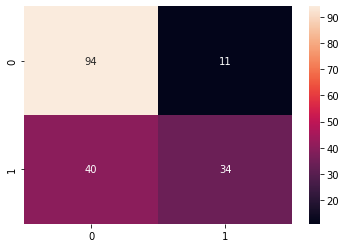

In [291]:
sns.heatmap(confusion, annot=True)

In [298]:
accuracy_score(y_true=y_val, y_pred=pred_validation)

0.7150837988826816

#### 1.7.3. Prepare for Kaggle

In [194]:
test_cleaned

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [223]:
X_test = test_cleaned.to_numpy(dtype=np.float32)

In [224]:
X_test = torch.from_numpy(X_test)

In [225]:
X_test.shape, X.shape # now it has the same shape as the input X for the NN train process

(torch.Size([418, 7]), torch.Size([891, 7]))

In [226]:
predictions = model.forward(X_test)

In [227]:
predictions[:15]#predictions>0.5

tensor([[0.1957],
        [0.1464],
        [0.1398],
        [0.2392],
        [0.3333],
        [0.3555],
        [0.2244],
        [0.4775],
        [0.3160],
        [0.4580],
        [0.2275],
        [0.3721],
        [0.6797],
        [0.2954],
        [0.5608]], grad_fn=<SliceBackward0>)

In [228]:
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0

In [229]:
predictions = predictions.detach().numpy()

In [234]:
predictions[:5]#.astype(np.int32)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [236]:
predictions = predictions.squeeze()

In [238]:
predictions = predictions.astype(np.int32)

In [239]:
predictions[:5]

array([0, 0, 0, 0, 0])

In [241]:
test.values[0,0]

892

#### 1.7.4. Save in needed submission-format as csv file

In [242]:
df_submission = pd.DataFrame(
    {
     "PassengerId": test.values[:,0],
     "Survived": predictions,
    }
)
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [299]:
#df_submission.to_csv("out/submission_pytorch.csv", index=False)